<h1><b>TESTS</b>
</h1>

<b>MSE (Mean Square Error)</b>
<br>
The lower, the better. Indicates the amount of noise contained within a picture.
<br>
<br>
$ MSE = \frac{\sum_{m,n} [I_1(m,n)-I_2(m,n)]^{2}}{M \cdot N} $ 
<br>
<br>
<br>
<b>PSNR (Peak Signal to Noise Ratio)</b>
<br>
The higher, the better. Indicates the maximum amount of noise relative to the picture.
<br>
<br>
$ PSNR = 10\log_{10} \left(\frac{R^2}{MSE}\right) $ 
<br>
<br>
<b>SSIM (Structural Similarity Index Measure)</b>
<br>
<br>
The higher the better, maximum similarity is 100%, least is 0%. Indicates similarity between two pictures at a higher level, since it measures a relative value.
<br>
Takes into account the mean and standard deviation of both pictures:
<br>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/63349f3ee17e396915f6c25221ae488c3bb54b66">

In [4]:
#colorspace_dict = { 0:"RGB", 1: "YCbCr"}
from enum import Enum

# Colorspaces available for embedding/decoding
class Colorspace(Enum):
    RGB     = 0
    YCbCr   = 1

# Image file formats when saving steganogram
class ImageType(Enum):
    png     = 0
    tif     = 1
    webp    = 2

# currently unused
class MessageType(Enum):
    utf8    = 0
    txt     = 1
    pdf     = 2
    gif     = 3

HEADER_LEN = 97

In [5]:
# MSE
from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error, variation_of_information
# import imquality.brisque as brisque
from FFT_stego import convert, stego_path_generator


# cover_img_path = "ImageSources\\jfif\\darth_vader.jfif"
# cover_img_path = "ImageSources\\jfif\\the_rock.jfif"
# cover_img_path = "ImageSources\\jfif\\obi-wan_kenobi.jfif"
# PATH = "ImageSources\\png\\r2d2.png"
# cover_img_path = "ImageSources\\jpg\\iron_patriot.jpg"
# cover_img_path = "ImageSources\\tif\\lena_color_512.tif"
cover_img_path = "ImageSources\\tif\\lena_color_256.tif"
# stego_img_path = "ImageSources\\Steganograms\\remerged_sharp.png"
# stego_img_path = "Steganograms\\lena_color_512_steg.png"
stego_img_path = "Steganograms\\lena_color_256_steg.png"
# stego_img_path = "Steganograms\\lena_color_512_steg.tif"

# stego_img_path = stego_path_generator(cover_img_path, "png")

# takes into account the error that occurs when transforming the channel to the frequency domain
def fft_correction(channel, clip: bool=False):
    fft = np.fft.fft2(channel)
    ifft = np.fft.ifft2(np.abs(fft)*np.exp(1j*np.angle(fft))).real
    if clip:
        converted = np.clip(ifft, 0,255).astype(np.uint8)
    else:
        converted = convert(ifft, 0,255, np.uint8)
    return converted


def test(cover_img_path, stego_img_path, channel: int=1, colorspace: Colorspace=Colorspace.RGB):
    image0 = Image.open(cover_img_path).convert(colorspace.name)
    image1 = Image.open(stego_img_path).convert(colorspace.name)
    cover_channel = image0.getchannel(channel)
    stego_channel = image1.getchannel(channel)

    # score_c = brisque.score(cover_channel)
    # score_s = brisque.score(stego_channel)
    # print(score_c, score_s)
    cover_channel = np.array(cover_channel)
    stego_channel = np.array(stego_channel)
    ssim = structural_similarity(cover_channel, stego_channel, gaussian_weights=True)

    size = cover_channel.shape

    # mse = np.divide(np.sum(np.square(np.subtract(cover_channel, stego_channel))), np.multiply(*(size)))
    mse = mean_squared_error(cover_channel, stego_channel)

    # psnr = 20*np.log10(255) - 10*np.log10(mse)
    psnr = peak_signal_noise_ratio(cover_channel, stego_channel)

    # voi = variation_of_information(cover_channel, stego_channel)
    return mse, psnr, ssim


mse, psnr, ssim= test(cover_img_path, stego_img_path)

print("MSE = ", mse)
print("PSNR =", psnr, "db")
print("SSIM =", ssim)

MSE =  0.537567138671875
PSNR = 50.82647648310367 db
SSIM = 0.9982297773373633


<h2>CROP</h2>

(256, 256)


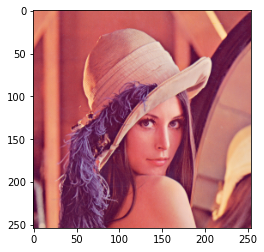

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
from FFT_stego import crop_path_generator, stego_path_generator

# cover_img_path = "ImageSources\\jpg\\lena_color_256.tif"
# stego_img_path = stego_path_generator(cover_img_path, "png")
stego_img_path = "ImageSources\\Steganograms\\lena_color_256_steg.png"

image = Image.open(stego_img_path)
size = image.size
print(size)

crop = 0.01  # crop 50%
crop /= 2

# left, up , right, bottom
# crop the image
cropped = image.crop((round(size[0]*crop),round(size[1]*crop), round(size[0]*(1-crop)),round(size[1]*(1-crop))))

# generates the path for the stego image from the name of the cover image and the path the current python file resides on

crop_img_path = crop_path_generator(stego_img_path, "png")
plt.figure()
plt.imshow(cropped)


cropped.save(crop_img_path)

<h2>Resize</h2>

In [7]:
from PIL import Image
from FFT_stego import resize_path_generator
import numpy as np

# stego_img_path = "ImageSources\\Steganograms\\lena_color_256_steg.png"
# # stego_img_path = "ImageSources\\Steganograms\\lena_color_256_steg_resize.png"

# steg = Image.open(stego_img_path)
# cols, rows = steg.size

# grow_factor = 0.1
# steg_resize = steg.resize((round(rows/grow_factor), round(cols/grow_factor)))

# resize_img_path = resize_path_generator(stego_img_path, "png")
# steg_resize.save(resize_img_path)

# cover_img_path = "ImageSources\\Steganograms\\lena_color_256_steg_resize.png"
# cover_img_path = "C:\\Users\\maxik\\Pictures\\BlueStacks\\IMG_20220109_222259.jpg"
cover_img_path = "ImageSources\\jpg\\iron_patriot.jpg"

steg = Image.open(cover_img_path)
cols, rows = steg.size

ratio = cols/rows

print("original rows, cols: ", rows, cols)
print("ratio: ", ratio)

# check if it is a wider ratio than 16/9 and if so, the columns have to be adjusted since they will be the maximum size (1600)
if ratio >= 16/9:
    if cols > 1600:
        new_cols = 1600
        new_rows = new_cols//ratio
else:
    if rows > 900:
        new_rows = 900
        new_cols = np.round(new_rows*ratio, decimals=0)

print("resized rows, cols: ", new_rows, new_cols)
steg_resize = steg.resize((round(new_cols), round(new_rows)))

resize_img_path = resize_path_generator(cover_img_path, "png")
steg_resize.save(resize_img_path)

original rows, cols:  1080 1920
ratio:  1.7777777777777777
resized rows, cols:  900.0 1600


<h2>Rotate</h2>

In [25]:
from PIL import Image
from FFT_stego import rotate_path_generator

stego_img_path = "ImageSources\\Steganograms\\lena_color_256_steg.png"
#read the image
im = Image.open(stego_img_path)

#rotate image
angle = 45
out = im.rotate(angle)
# out = im.rotate(angle, expand=True)

stego_img_path = rotate_path_generator(stego_img_path, "png")
out.save(stego_img_path)

<h2>Decoder</h2>

In [7]:
from FFT_stego import steg_decode_simple

stego_img_path = "Steganograms\\lena_color_256_steg.png"
# stego_img_path = "ImageSources\\Steganograms\\remerged_sharp.png"

# parsed_text = steg_decode_simple(stego_img_path, cut=0.18768376411533313,colorspace="YCbCr")
parsed_text = steg_decode_simple(stego_img_path, cut=0.3859145678915704)
print(parsed_text)


It's about drive, it's about power💪🧱▶🟥🎶🎧
We stay hungry, we devour
Put in the work, put in the hours and take what's ours (ahoo)
Black and Samoan in my veins
My culture bangin' with Strange
I change the game, so what's my motherfuckin' name (Rock)
(What they gonna get though?)
Desecration, defamation, if you wanna bring it to the masses
Face to face, now we escalatin', when I have to put boots to asses
Mean on ya, like a dream when I'm rumblin', you're gonna scream mama
So bring drama to the King Brahma (then what?) 
Comin' at you with extreme mana



<h2>Absolute FFT</h2>

time for fft: 0.004672500000197033
time for rfft: 0.0029644999995070975
improvement of factor: 1.5761511219341953


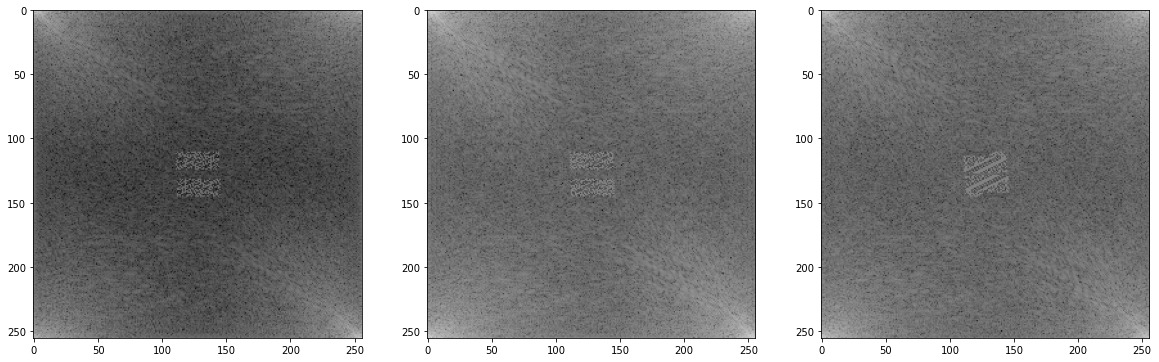

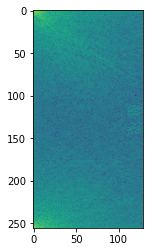

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from time import perf_counter

# img_path = "Steganograms\\lena_color_512_steg.png"
# img_path = "Steganograms\\lena_color_256_steg.png"
img_path = "Steganograms\\remerged_sharp.png"

image = Image.open(img_path).convert(mode="RGB")
channel0, channel1, channel2 = image.split()

fft_abs0 = 10*np.log10(np.abs(np.fft.fft2(channel0)))
t0 = perf_counter()
fft_abs1 = 10*np.log10(np.abs(np.fft.fft2(channel1)))
t1 = perf_counter()
fft_abs2 = 10*np.log10(np.abs(np.fft.fft2(channel2)))

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(fft_abs0, cmap="gray")
plt.subplot(132)
plt.imshow(fft_abs1, cmap="gray")
plt.subplot(133)
plt.imshow(fft_abs2, cmap="gray")


plt.figure()

t2 = perf_counter()
fft_rabs1 = 10*np.log10(np.abs(np.fft.rfft2(channel1)))
t3 = perf_counter()
plt.imshow(fft_rabs1)
print("time for fft:", t1-t0)
print("time for rfft:", t3-t2)
print("improvement of factor:", (t1-t0)/(t3-t2))

<h2>Show all 3 channels<h2>

image size:  (256, 256)


Text(0.5, 1.0, 'Blue')

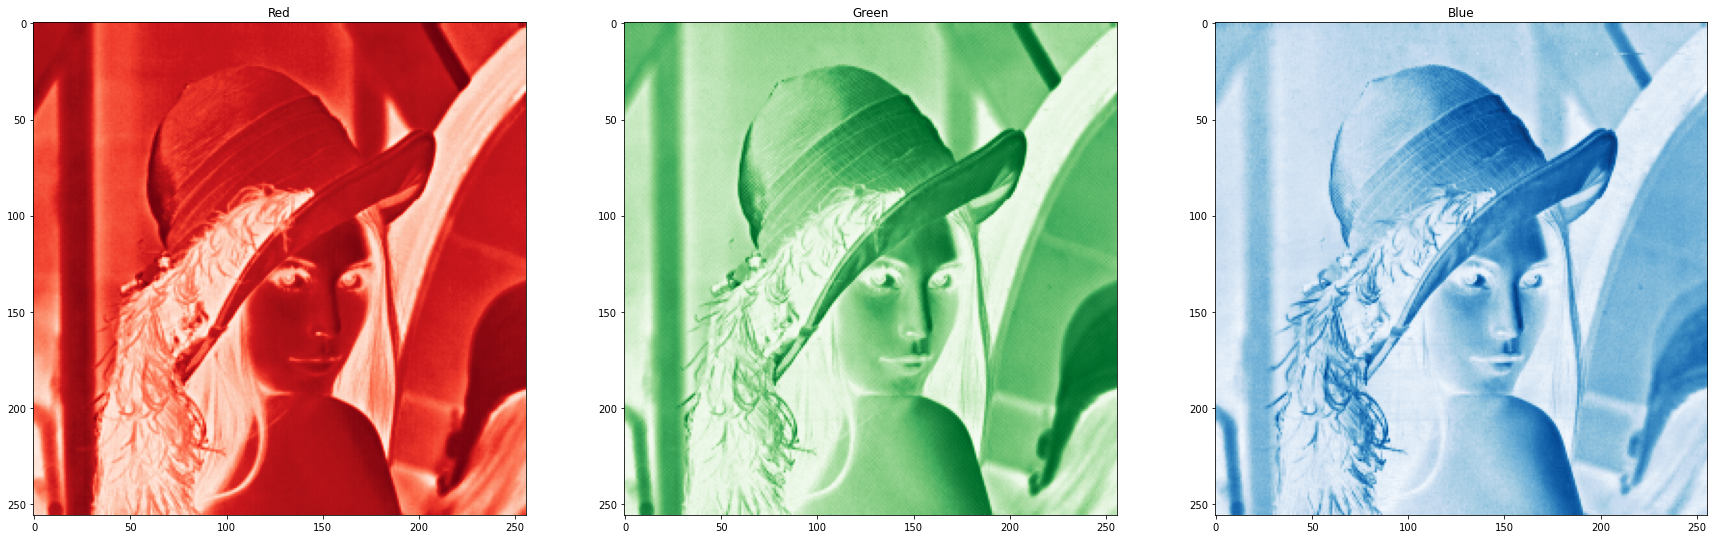

In [9]:
# img_path = "Steganograms\\lena_color_512_steg.png"
img_path = "Steganograms\\lena_color_256_steg.png"

image = Image.open(img_path)
channel0, channel1, channel2 = image.split()

print("image size: ",image.size)

plt.figure(figsize=(30,30))
plt.subplot(131)
plt.imshow(channel0, cmap="Reds")
plt.title("Red")
plt.subplot(132)
plt.imshow(channel1, cmap="Greens")
plt.title("Green")
plt.subplot(133)
plt.imshow(channel2, cmap="Blues")
plt.title("Blue")

In [16]:
from cryptography.fernet import Fernet

# text = '0.1684086173636722'
cut = 0.1684086173636722
print("{}".format(cut))
text = "{}".format(cut)

def encrypt(message: bytes, key: bytes) -> bytes:
    return Fernet(key).encrypt(message)

def decrypt(token: bytes, key: bytes) -> bytes:
    return Fernet(key).decrypt(token)

def generate_key() -> bytes:
    key = Fernet.generate_key()
    return key

key = generate_key()
token = encrypt(text.encode(), key)
decrypted = decrypt(token, key).decode()

print(text)
print(token)
print(decrypted)


# str = hashlib.sha256(text.encode('utf-8'))
# text_hashed = str.hexdigest()
# print(text_hashed)

0.1684086173636722
0.1684086173636722
b'gAAAAABh3fawZNoUngXADyLiROHs3DXWO2lF9u3wajm4svbVJ7RzIlmxXgBg-emGAWwUmdkKpuFRuc25QABHzsH2oplIpbsKSRyUFIhy3yNuZ_pDLq_zbrc='
0.1684086173636722


<h1>Automated test</h1>

<div>
Test fft gain finder process by <b>altering</b> 
<ul>
    <li>recursion</li>
    <li>cut</li>
    <li>image size</li>
    <li>payload</li>
    <li>image type</li>
</ul>
<ul>
    <li>increase recursion from 0 to 10</li>
    <li>increase max cut from 0.05 to 0.95</li>
    <li>increase image size from 256 to 512</li>
    <li>increase payload from 8 to 100000 bits</li>
    <li>change image type from .png to .tif</li>
</ul>
</div>

In [9]:
from FFT_stego import *
from PIL import Image
from tabulate import tabulate
import csv
from time import perf_counter

# cover_img_path = "ImageSources\\tif\\mandril_color.tif"
# cover_img_path = "ImageSources\\tif\\lena_color_512.tif"
cover_img_path = "ImageSources\\tif\\lena_color_256.tif"
# cover_img_path = "ImageSources\\jpg\\iron_patriot.jpg"

stego_img_path = stego_path_generator(cover_img_path, ImageType.png)
# stego_img_path = stego_path_generator(cover_img_path, "tif")

# message = "At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet."
message = \
"""\
Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam🖐🤚🖖👋🖐🤚🖖👋🖐🤚🖖👋\
"""
# """
# It's about drive, it's about power💪🧱▶🟥🎶🎧
# We stay hungry, we devour
# Put in the work, put in the hours and take what's ours (ahoo)
# Black and Samoan in my veins
# My culture bangin' with Strange
# I change the game, so what's my motherfuckin' name (Rock)
# (What they gonna get though?)
# Desecration, defamation, if you wanna bring it to the masses
# Face to face, now we escalatin', when I have to put boots to asses
# Mean on ya, like a dream when I'm rumblin', you're gonna scream mama
# So bring drama to the King Brahma (then what?) 
# Comin' at you with extreme mana
# """

load_settings()

def mprint(metrics: list, meas: str="measured quantity"):
    headers = [meas, "MSE", "PSNR", "SSIM", "CUT", "GAIN", "TIME (S)"]
    with open('metrics.csv', 'w', newline="") as fp:
        writer = csv.writer(fp, delimiter=',')
        writer.writerow(headers)
        for row in metrics:
            writer.writerow(row)
    print(tabulate(metrics, headers=headers))


# resize test
def resize_test(multiply: int):
    table = []
    set_maxcut(0.4)
    for factor in range(1,multiply+1):
        cover_img = Image.open(cover_img_path)
        size = cover_img.size
        cover_img = cover_img.resize((round(size[0]*factor/2), round(size[1]*factor/2)))
        # overwrite cover_img_path
        # c_img_path = resize_path_generator(cover_img_path, "tif")
        c_img_path = resize_path_generator(cover_img_path, "tif")
        cover_img.save(c_img_path)
        # s_img_path = stego_path_generator(c_img_path, "tif")
        s_img_path = stego_path_generator(c_img_path, "tif")

        t0 = perf_counter()
        try:
            cut, gain = steg_encode_simple(c_img_path, message, optcut=False, staticgain=100000, imagetype="tif")
        except:
            cut = 0
            gain = 0
        t1 = perf_counter()

        metrics = test(c_img_path, s_img_path)

        # print("image size:",(round(size[0]*factor), round(size[1]*factor)))
        mylist = [(round(size[0]*factor/2), round(size[1]*factor/2))] + [jj for jj in metrics] + [cut, gain, t1-t0]
        table.append(mylist)
    mprint(table, "size")
    print(c_img_path, s_img_path)

# resursion test
def recursion_test(count):
    table = []
    for ii in range(count):
        t0 = perf_counter()
        set_settings(recursive_count_=ii, optcut_=True)
        cut, gain = steg_encode_simple(cover_img_path, message)
        print("final gain: ", gain)
        t1 = perf_counter()
        metrics = test(cover_img_path, stego_img_path, 0)

        mylist = [ii] + [jj for jj in metrics] + [cut, gain, t1-t0]
        table.append(mylist)
    mprint(table, "recursion count")

# payload test
def payload_test(factor):
    table = []
    set_maxcut(0.4)
    for ii in range(1,factor):
        t0 = perf_counter()
        try:
            cut, gain = steg_encode_simple(cover_img_path, message*ii, optcut=True, imagetype="tif", recursive_cnt=5)
            print("final gain: ", gain)
        except Exception:
            break
        t1 = perf_counter()
        metrics = test(cover_img_path, stego_img_path)
        mylist = [ii*len(message)] + [jj for jj in metrics] + [cut, gain, t1-t0]
        table.append(mylist)
    mprint(table, "message length")


# cut test
def cut_test(res):
    table = []
    for ii in range(res):
        t0 = perf_counter()
        set_maxcut(ii/res)
        if ii == 0:
            set_maxcut(0.2)
            cut, gain = steg_encode_simple(cover_img_path, message, staticgain=100000, optcut=True, imagetype="tif")
        else:
            try:
                cut, gain = steg_encode_simple(cover_img_path, message, staticgain=100000, imagetype="tif")
            except Exception:
                cut = 0.0
                gain = 0
        t1 = perf_counter()
        metrics = test(cover_img_path, stego_img_path)

        mylist = [cut] + [jj for jj in metrics] + [cut, gain, t1-t0]
        table.append(mylist)
    mprint(table, "cut")


# resize_test(10)
# payload_test(20)
recursion_test(20)
# cut_test(100)

USER variable(s) set!
Gain found!:  [10000, 10000, 10000]
embeding of secret message complete: c:\Users\maxik\Documents\Semester_6\Projektarbeit\github_repo\Steganography\Steganograms\lena_color_256_steg.png
final gain:  [10000, 10000, 10000]
USER variable(s) set!
Gain found!:  [10000, 10000, 10000]
embeding of secret message complete: c:\Users\maxik\Documents\Semester_6\Projektarbeit\github_repo\Steganography\Steganograms\lena_color_256_steg.png
final gain:  [5000, 5000, 5000]
USER variable(s) set!
Gain found!:  [10000, 10000, 10000]
embeding of secret message complete: c:\Users\maxik\Documents\Semester_6\Projektarbeit\github_repo\Steganography\Steganograms\lena_color_256_steg.png
final gain:  [5000, 5000, 5000]
USER variable(s) set!
Gain found!:  [10000, 10000, 10000]
embeding of secret message complete: c:\Users\maxik\Documents\Semester_6\Projektarbeit\github_repo\Steganography\Steganograms\lena_color_256_steg.png
final gain:  [5000, 5000, 5000]
USER variable(s) set!
Gain found!:  [